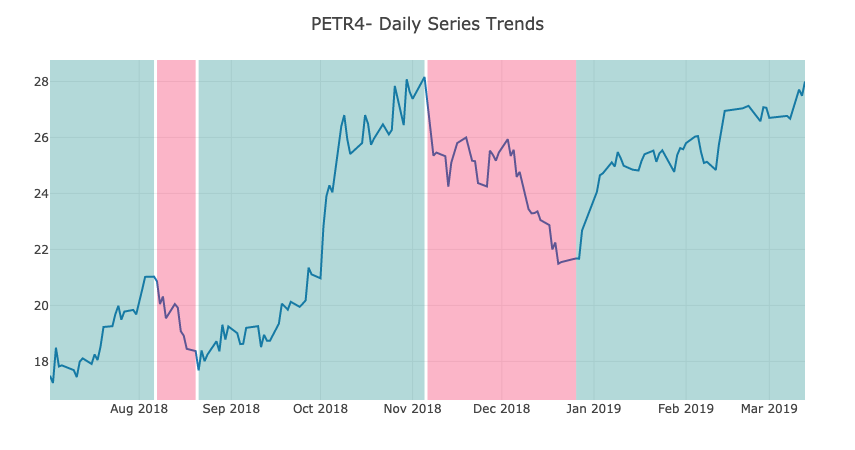

In [4]:
using PrevisibilityCrawler
using Dates: Date
using CSV
top20 = CSV.read("data/csv_files/top20_d.csv");
tick = top20[top20.tick .== "PETR4", :]
dates = Date.(tick.datetime)
trace = pty.scatter(;x=dates,y=tick.lastPrice, name="price")
upsbegins = [dates[1], dates[36], dates[120]]
upsends = [dates[25], dates[87], dates[end]]
downbegins = [dates[26], dates[88]]
downsends = [dates[35], dates[120]]
ups = pty.rect(upsbegins,upsends,0,1;xref="x",yref="paper",line_width=0,fillcolor="#008080", opacity=.3)
downs = pty.rect(downbegins,downsends,0,1;xref="x",yref="paper",line_width=0,fillcolor="#F30845", opacity=.3)
pty.plot([trace], pty.Layout(;shapes=[ups;downs],title="PETR4- Daily Series Trends"))

In [ ]:
control = CSV.read("data/csv_files/abev3_control.csv");


In [6]:
using Indicators

┌ Info: Precompiling Indicators [70c4c096-89a6-5ec6-8236-da8aa3bd86fd]
└ @ Base loading.jl:1273


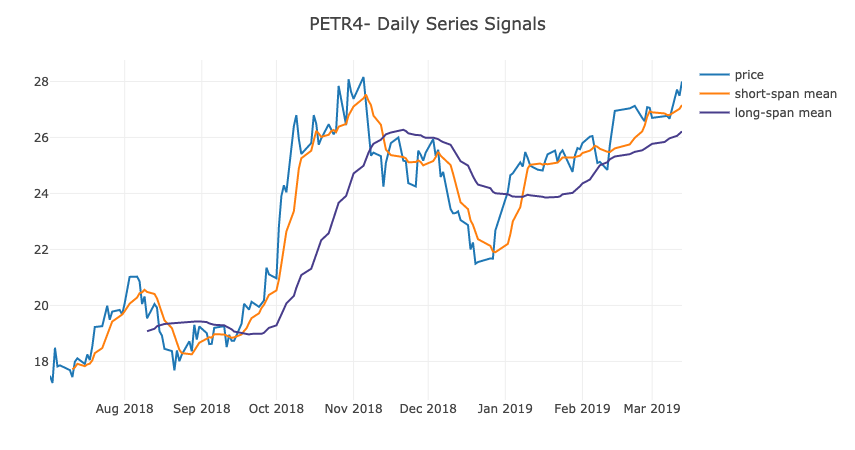

In [20]:
series = tick.lastPrice
ema7 = sma(series, n=7);
ema29 = sma(series, n=29)
trace2 = pty.scatter(;x=dates,y=ema7, name="short-span mean")
trace3 = pty.scatter(;x=dates,y=ema27, name="long-span mean", line_color="#483D8B")
pty.plot([trace, trace2, trace3], pty.Layout(title="PETR4- Daily Series Signals"))

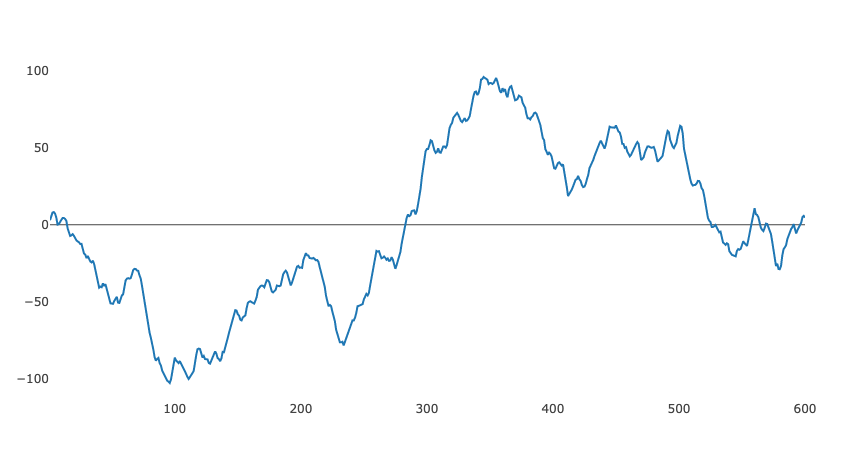

In [3]:
pty.plot(cumsum(ar1(600)[:, 1], dims=1), pty.Layout(xaxis_showgrid=false, yaxis_showgrid=false))

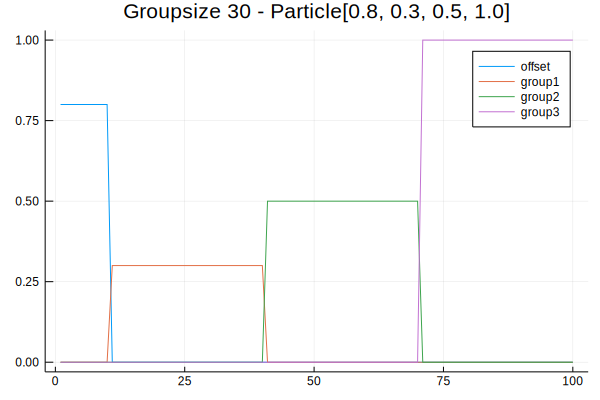

In [3]:
x = collect(1:100)
offset = (a = zeros(100); a[1:10] = fill(.8, 10); a);
group1 = (a = zeros(100); a[11:40] = fill(.3, 30); a);
group2 = (a = zeros(100); a[41:70] = fill(.5, 30); a);
group3 = (a = zeros(100); a[71:100] = fill(1.0, 30); a);
plt.plot([offset, group1, group2, group3], labels=["offset","group1", "group2","group3"], title="Groupsize 30 - Particle[0.8, 0.3, 0.5, 1.0]")

In [25]:
n = 30
p = .3
x = -p:(1/n):(1-p)
b(x, p, n) = binomial(n, Int64(round(n*(x + p)))) * (p ^ (n*(x + p))) * ((1-p) ^ (n*(1 - x - p)))

b (generic function with 1 method)

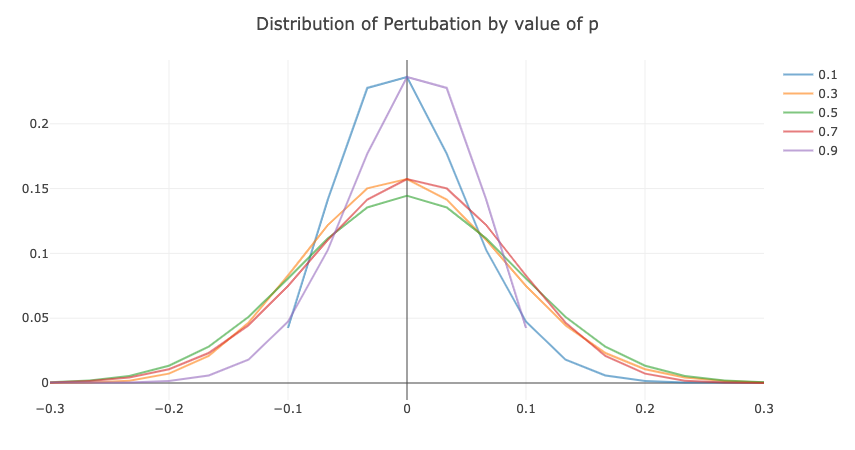

In [52]:
n = 30
# colors = ["#177e89", "#292929", "#e40c2b"]
traces = [pty.scatter(x=collect(-p:(1/n):(1-p)), 
                      y=b.(collect(-p:(1/n):(1-p)), p, n), 
                      name="$p", opacity=.6) for (i,p) in enumerate([.1, .3, .5,.7, .9])]
pty.plot(traces, pty.Layout(xaxis_range=(-.3,.3), title="Distribution of Pertubation by value of p"))

In [22]:
round.(n*(collect(x) .+ p))

31-element Array{Float64,1}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0
 11.0
 12.0
  ⋮  
 19.0
 20.0
 21.0
 22.0
 23.0
 24.0
 25.0
 26.0
 27.0
 28.0
 29.0
 30.0